# Task 1: Exploratory Data Analysis (EDA)

**Objective:** To understand the LendingClub dataset, identify key predictive features, uncover data quality issues, and formulate a robust preprocessing strategy for our models.

**Workflow:**
1.  **Initial Data Loading & Inspection:** Get a first look at the data's size, columns, and data types.
2.  **Target Variable Analysis:** Understand the distribution of `loan_status`, which is critical for our modeling task.
3.  **Univariate Analysis:** Analyze individual features to understand their distributions and characteristics.
4.  **Bivariate Analysis:** Explore the relationship between key features and the target variable (loan default).
5.  **Missing Value Analysis:** Systematically identify and quantify the extent of missing data.
6.  **Formulate Preprocessing Plan:** Summarize findings into a concrete set of steps to be implemented in `preprocess.py`.

## 1. Initial Data Loading & Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display options for better viewing
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# plot style
sns.set_style('whitegrid')

In [ ]:
# the path to the raw data
DATA_PATH = '../data/raw/accepted_2007_to_2018.csv'

# The dataset is very large. We use low_memory=False to avoid DtypeWarning.

df = pd.read_csv(DATA_PATH, low_memory=False)
# df = pd.read_csv(DATA_PATH, low_memory=False, nrows=200000) # For faster iteration

In [4]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (2260701, 151)


Let's get a first look at the columns and a few sample rows.

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

Use `df.info()` to get a concise summary of the DataFrame, including data types and non-null counts. This is our first clue for identifying missing values and incorrect data types.

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

## 2. Target Variable Analysis: `loan_status`

Our goal is to predict loan default. The `loan_status` column contains the outcome of each loan. We need to understand its distribution and convert it into a binary target for our models.

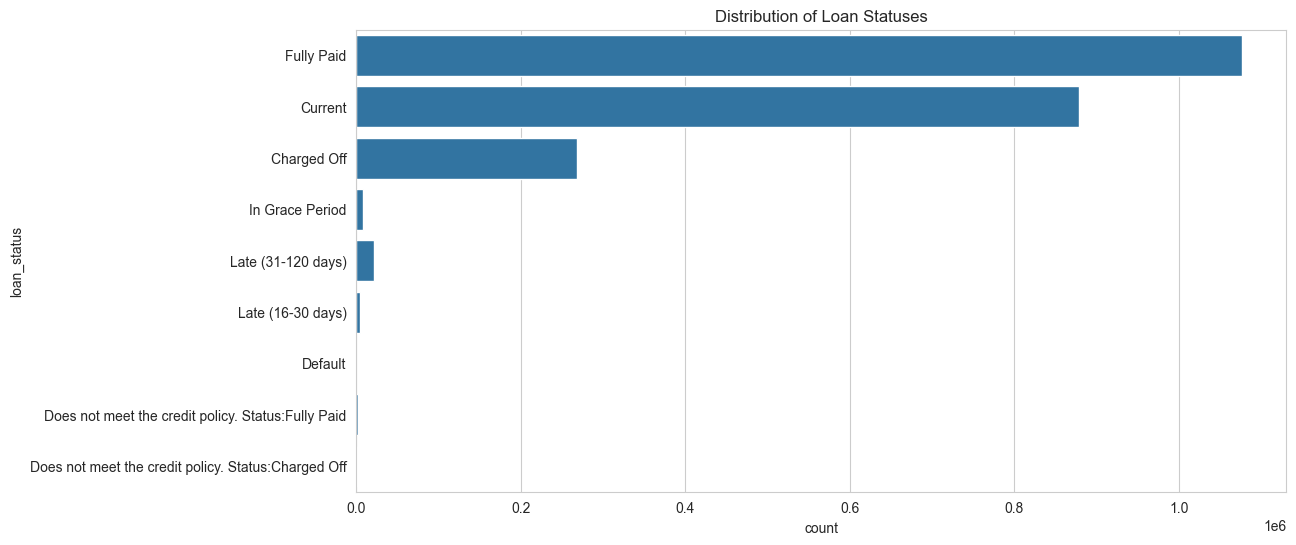

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['loan_status'])
plt.title('Distribution of Loan Statuses')
plt.show()

**Observation & Plan:**
- The dataset contains loans that are still ongoing (`Current`, `In Grace Period`, etc.). These are not useful for training because their final outcome is unknown. We must filter our dataset to only include loans that have concluded.
- We will define our binary target as:
  - **1 (Default):** 'Charged Off', and potentially other statuses like 'Default', 'Late (31-120 days)'. For this project, we will stick to 'Charged Off' as the primary default indicator.
  - **0 (Paid Off):** 'Fully Paid'.
- The classes are imbalanced ('Fully Paid' significantly outnumbers 'Charged Off'). This is a critical finding that will influence our choice of evaluation metrics (like F1-Score) later.

## 3. Univariate Analysis (Exploring Key Features)

### Numeric Features

In [8]:
# summary of key numeric columns
df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']].describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02


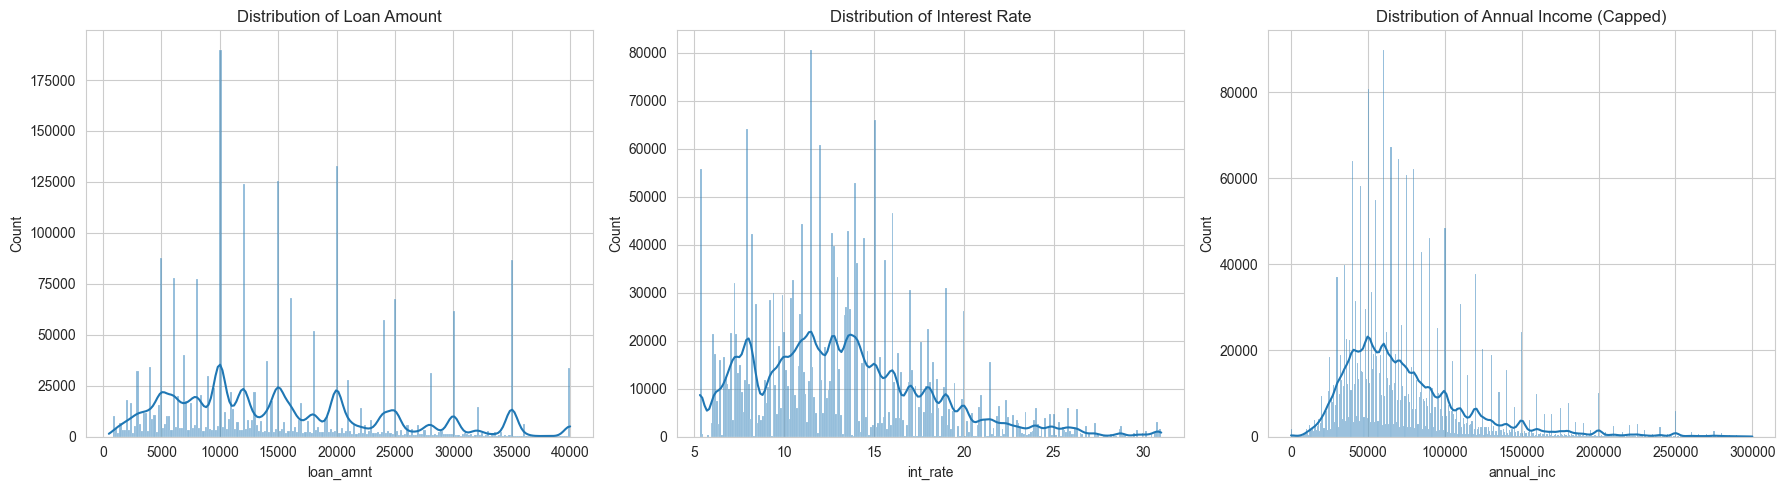

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['loan_amnt'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Loan Amount')

sns.histplot(df['int_rate'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Interest Rate')

# We will check for outliers in annual income by filtering
sns.histplot(df[df['annual_inc'] < 300000]['annual_inc'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Annual Income (Capped)')

plt.tight_layout()
plt.show()

**Observations:**
- `loan_amnt` shows spikes at round numbers (e.g., 10k, 20k), as expected.
- `int_rate` has a multi-modal distribution, likely corresponding to different risk grades.
- `annual_inc` is heavily right-skewed. Using a log transform or capping outliers might be necessary for some models, but scaling should handle it for our NNs.

### Categorical Features

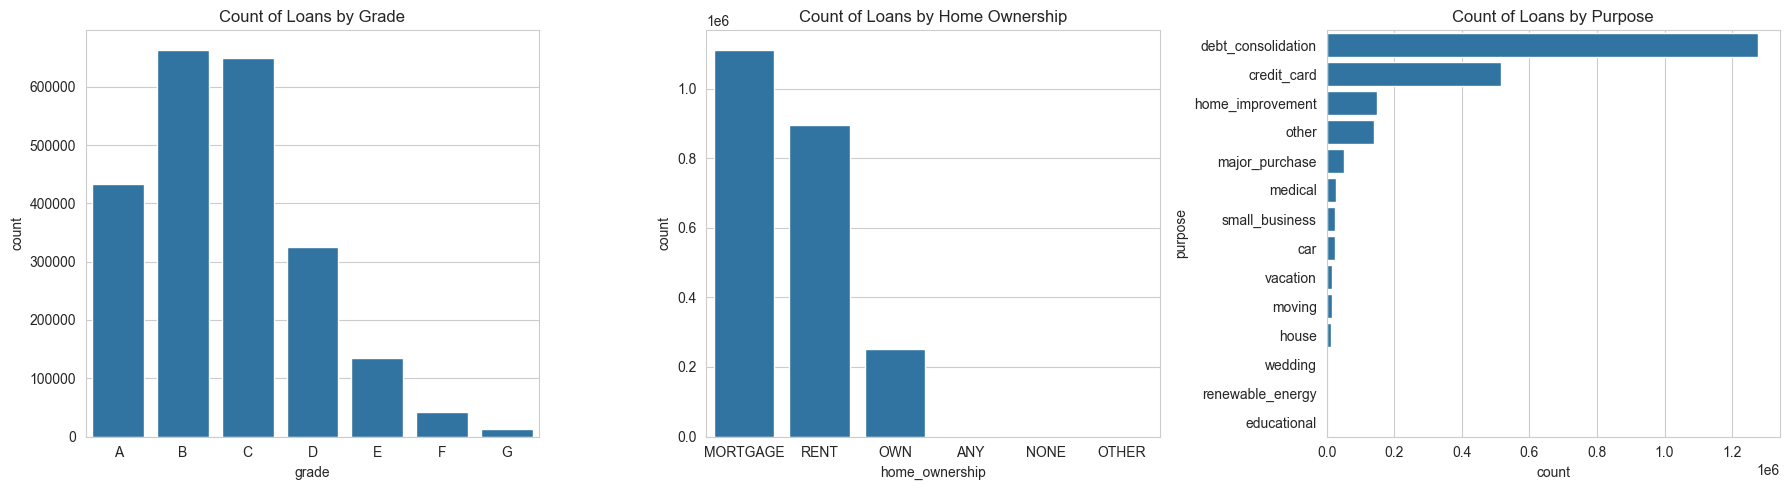

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='grade', data=df, order=sorted(df['grade'].dropna().unique()), ax=axes[0])
axes[0].set_title('Count of Loans by Grade')

sns.countplot(x='home_ownership', data=df, ax=axes[1])
axes[1].set_title('Count of Loans by Home Ownership')

sns.countplot(y='purpose', data=df, order=df['purpose'].value_counts().index, ax=axes[2])
axes[2].set_title('Count of Loans by Purpose')

plt.tight_layout()
plt.show()

**Observations:**
- `grade` is an ordinal feature, with most loans concentrated in grades B and C.
- `home_ownership` is dominated by 'MORTGAGE' and 'RENT'. 'ANY' and 'NONE' are extremely rare and could be grouped.
- `purpose` shows 'debt_consolidation' and 'credit_card' are by far the most common reasons for loans.

## 4. Bivariate Analysis (Feature vs. Target)

This is where we look for predictive power. How do feature distributions differ for loans that were 'Fully Paid' vs. 'Charged Off'?

In [ ]:
# now let's create a temporary dataframe with only the concluded loans for this analysis
analysis_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
analysis_df['target'] = (analysis_df['loan_status'] == 'Charged Off').astype(int)

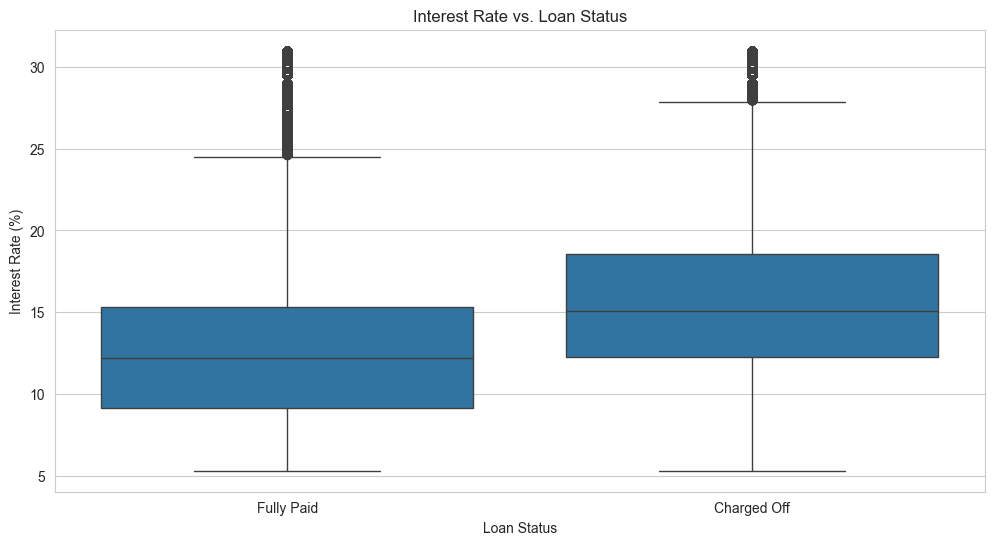

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=analysis_df)
plt.title('Interest Rate vs. Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xlabel('Loan Status')
plt.show()

**Observation:** This is a very strong signal. 'Charged Off' loans have a significantly higher median and overall distribution of interest rates. This confirms `int_rate` is a key predictive feature.

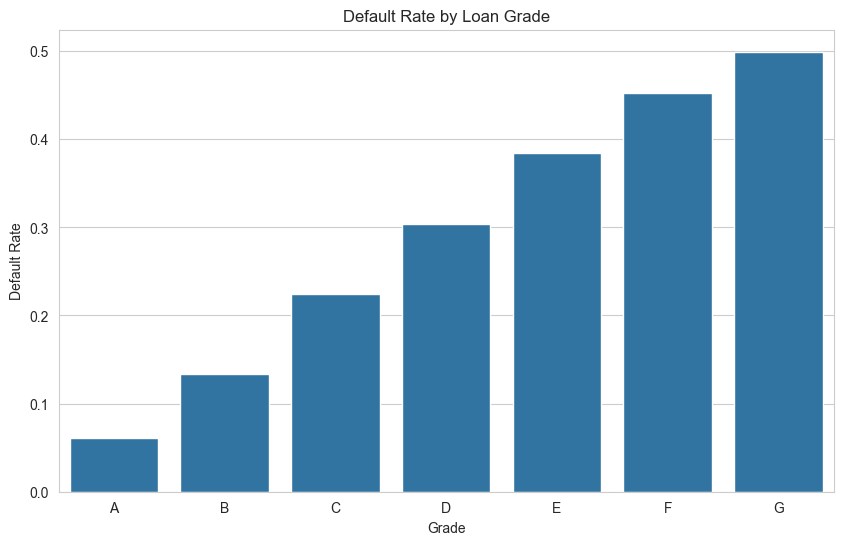

In [13]:
# now we will look at the default rate by Grade
default_rate_by_grade = analysis_df.groupby('grade')['target'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='target', data=default_rate_by_grade, order=sorted(default_rate_by_grade['grade']))
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grade')
plt.show()

**Observation:** Another very strong signal. The default rate increases almost monotonically as the grade gets worse (from A to G). `grade` will be a crucial feature.

## 5. Missing Value Analysis

Now we must systematically find all columns with missing values and decide on a strategy. Columns that are mostly empty are candidates for removal.

In [1]:
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_df = pd.DataFrame({'count': null_counts, 'percentage': null_percentage})

# columns with a significant number of missing values
print("Columns with more than 30% missing values:")
print(null_df[null_df['percentage'] > 30].sort_values(by='percentage', ascending=False))

NameError: name 'df' is not defined

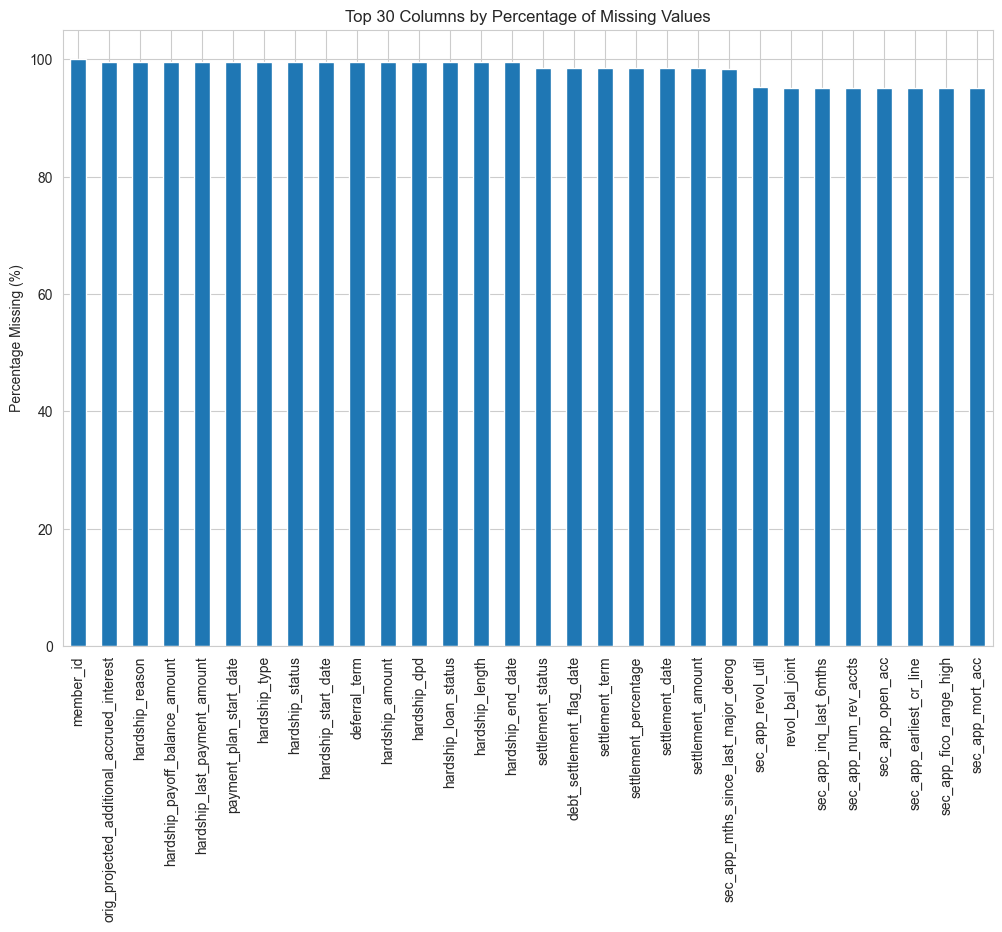

In [15]:
# top 30 columns with missing data
plt.figure(figsize=(12, 8))
null_df['percentage'].sort_values(ascending=False).head(30).plot(kind='bar')
plt.title('Top 30 Columns by Percentage of Missing Values')
plt.ylabel('Percentage Missing (%)')
plt.show()

**Observation & Plan:**
- There are dozens of columns with a very high percentage (>40%) of missing values. Many of these (like `dti_joint`, `sec_app_*`, `mths_since_last_major_derog`) seem to be related to joint applications or are very sparse credit history details.
- It is not feasible to impute these. Our strategy will be to **aggressively drop** any column with more than a certain threshold (e.g., 30-40%) of missing values.
- For columns with a small percentage of nulls (e.g., `dti`, `emp_length`), we will use an imputation strategy like filling with the median.

## 6. Actionable Insights & Preprocessing Plan

Based on this exploration, we can now define a clear, step-by-step plan for the `preprocess.py` script.

1.  **Filter Rows:** Keep only loans with `loan_status` of 'Fully Paid' or 'Charged Off'.
2.  **Create Target:** Create a binary `target` column where 'Charged Off' is 1 and 'Fully Paid' is 0.
3.  **Drop Columns:**
    - **Data Leakage:** Drop columns that contain information about the loan's outcome, such as `total_pymnt`, `recoveries`, `last_pymnt_d`, etc. These would not be available at the time of the loan application.
    - **High Nulls:** Drop all columns identified above with a high percentage of missing values (e.g., >30%). This includes `mths_since_last_delinq`, `desc`, all `sec_app_*`, all `hardship_*`, etc.
    - **Redundant/ID Columns:** Drop identifiers like `id`, `member_id`, `url`, and redundant features like `sub_grade` (since `grade` captures most of the information).
4.  **Feature Engineering & Cleaning:**
    - `term`: Convert from string (' 36 months') to integer (36).
    - `emp_length`: Convert from string ('10+ years', '< 1 year') to an ordered integer (10, 0).
    - `earliest_cr_line`: Convert to a numeric feature representing the length of the applicant's credit history in years at the time the loan was issued.
5.  **Handle Remaining Missing Values:** For important features with a small number of nulls (`dti`, `revol_util`, etc.), impute using the median.
6.  **Encode Categorical Features:** Convert all remaining object-type columns (`grade`, `home_ownership`, `purpose`, etc.) into numeric format using one-hot encoding.
7.  **Data Splitting & Scaling:** Split the data into training and testing sets. Fit a `StandardScaler` on the training data and use it to transform both the train and test sets.

This comprehensive plan will now be implemented in the `src/data_processing.py` and `preprocess.py` scripts.